# EDA ON HOME CREDIT DATASET

# Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#!wget --header="Host: doc-0s-3g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_6i6311e1ha4e3lu90s1q4hbjnb369mac_nonce=c1gj2ba19umja" --header="Connection: keep-alive" "https://doc-0s-3g-docs.googleusercontent.com/docs/securesc/7jhvm23dpf0jsrpv14f2fr5ihu8tg8kq/pr2esn56d1dgabmnaegqt55utpvf00am/1647060075000/17867563074405901316/17867563074405901316/1O4UgcWFo84LG3Ebcr3epzCEK7-625SFS?ax=ACxEAsasWPRBCazbPEYZDHx9GvKrAzJ6ZWb25M0iq0rRmXSn8LinTFWwwgKi_bo8HrfPlfXXMXkkLP2JziinLBUukoKgsh2-62S7x4YCC57LwGBOvPWLsU0KkqFjpEsHYMZXFBLmNW6gKAA_DcxYaTVr1LSxMrItiwnXeIBInZ4efejBNwBkb-8EtuMJTIKP_G79L5X-mIGBbzVmEfQPU25ad66XE-ooIipJVRsB9R60QEiDDkCu4ViJkhWgfscogI-kso6MgN5zSUZyMLuCHSbAt5aYQzj9Ezi8Uh_hfp6mDl-Y_AiBggFXtQ2GCYamAHqTMJNcnpYQPFDvTqOF4Rqx4wnAlrLrRcF848IiOhE9JWvAAXJ506e6Yxkmc0jqcCSBS2TWutjaNF9zdhtfK5_A51AKm93-jWoB9ajlixGl1R1-I4CLV2HkedMaJcLlZ0YOnBPCP6vmYmTQJoXKdaiFjTbEdFojeMHdvCMES40V_6KsBDMQ8-T52qmkCX_sA7uUvjej3B2C5jaU3z2EiFTIsFRRheQ52LDt3IYhob66TvvNd3RVxwjqc4SdPVQT4EvHuCkHkT_-m4T2GxxEqLCTwkm1rspuNBm1aj4vnrkO2z0dpLBHLwhXdw-7BdVXoCP81DaYqSv7d9wV6dWwX0YzdbmXWQljX00uik7njIZz&authuser=0&nonce=c1gj2ba19umja&user=17867563074405901316&hash=jqcapriiavkn5grto9fklcoafo8imjag" -c -O 'complete_data.zip'

Unzip Files

In [ ]:
#get_ipython().system_raw("unzip complete_data.zip")

# Creating the complete data using all the csv files

In [ ]:
app_train = pd.read_csv('/content/application_train.csv')

In [ ]:
#Check the Features in application Train dataset
app_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Add Bureau data

In [ ]:
#Check the Features in bureau dataset
bureau = pd.read_csv('/content/bureau.csv')
bureau.head(2)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN


In [ ]:
cat=bureau.select_dtypes('object') #Select categorical dataset
cat_list= list(cat.columns.values) #Make a list of categorical dataset
bureau_dum=pd.get_dummies(bureau[cat_list]) #Perform One hot Encoding on the Categorical Dataset
bureau_num = bureau.drop(cat_list,axis=1) 
bureau_num = pd.concat([bureau_num,bureau_dum],axis=1) #Concatenate the categorical and Numerical dataset

In [ ]:
bureau_num = bureau_num.drop(['SK_ID_BUREAU'],axis=1)
bureau_num = bureau_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()

In [ ]:
bureau_num=bureau_num.rename(columns= lambda x: 'BU_'+x if x !='SK_ID_CURR' else x) #Update the name of the Features
app_train = app_train.merge(bureau_num, on='SK_ID_CURR', how='left') #Merge the features on the SK_ID_CURR
del bureau_num
del bureau

# Add Credid Card Balance

In [ ]:
cc_bal = pd.read_csv('/content/credit_card_balance.csv')
cc_bal.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0


In [ ]:
cc_bal_dum=pd.get_dummies(cc_bal['NAME_CONTRACT_STATUS'])
cc_bal_num=cc_bal.drop(['NAME_CONTRACT_STATUS'],axis=1)
cc_bal_num= pd.concat([cc_bal_num,cc_bal_dum],axis=1)
cc_bal_num =cc_bal_num.drop(['SK_ID_PREV'],axis=1)
cc_bal_num =cc_bal_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()
cc_bal_num =cc_bal_num.rename(columns= lambda x: 'CCB_'+x if x !='SK_ID_CURR' else x)
app_train = app_train.merge(cc_bal_num, on='SK_ID_CURR', how='left')
del cc_bal_num
del cc_bal

# Add Installment Payements

In [ ]:
install_pay = pd.read_csv('/content/installments_payments.csv')
install_pay.head(1)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.36,6948.36


In [ ]:
install_pay_num =install_pay.drop(['SK_ID_PREV'],axis=1)
install_pay_num =install_pay_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()
install_pay_num =install_pay_num.rename(columns= lambda x: 'IP_'+x if x !='SK_ID_CURR' else x)
app_train = app_train.merge(install_pay_num, on='SK_ID_CURR', how='left')
del install_pay_num
del install_pay

# Add POS_CASH

In [ ]:
pcb = pd.read_csv('/content/POS_CASH_balance.csv')
pcb.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


In [ ]:
pcb_dum=pd.get_dummies(pcb['NAME_CONTRACT_STATUS'])
pcb_num=pcb.drop(['NAME_CONTRACT_STATUS'],axis=1)
pcb_num= pd.concat([pcb_num,pcb_dum],axis=1)

In [ ]:
pcb_num =pcb_num.drop(['SK_ID_PREV'],axis=1)
pcb_num =pcb_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()

In [ ]:
pcb_num = pcb_num.rename(columns= lambda x: 'PCB_'+x if x !='SK_ID_CURR' else x)
app_train = app_train.merge(pcb_num, on='SK_ID_CURR', how='left')
del pcb_num
del pcb

# Add Previous Application

In [ ]:
prev_app = pd.read_csv('/content/previous_application.csv')
prev_app.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0


In [ ]:
cat=prev_app.select_dtypes('object')
cat_list= list(cat.columns.values)
prev_app_dum=pd.get_dummies(prev_app[cat_list])

In [ ]:
prev_app_num = prev_app.drop(cat_list,axis=1)
prev_app_num = pd.concat([prev_app_num,prev_app_dum],axis=1)

In [ ]:
prev_app_num = prev_app_num.drop(['SK_ID_PREV'],axis=1)
prev_app_num = prev_app_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()

In [ ]:
prev_app_num = prev_app_num.rename(columns= lambda x: 'PA_'+x if x !='SK_ID_CURR' else x)
app_train = app_train.merge(prev_app_num, on='SK_ID_CURR', how='left')
del prev_app_num
del prev_app

# Data Imbalance

We can see that the total number of data points in the data set is 307511, also we have many features

In [ ]:
app_train.shape

(307511, 366)

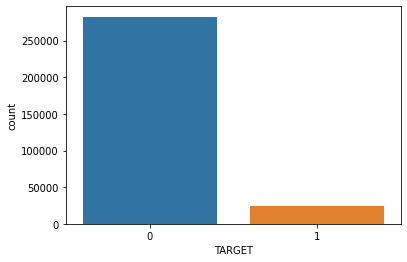

In [ ]:
sns.countplot(x='TARGET',data =app_train)
plt.show()

From the above plot its very clear that the data is highly imbalanced. We have lots of datapoints for the people who have paid the loan back which is denoted by zero and we have few defaulters which is denoted by one. We will have to accordingly take care of the class weightage at time of model training.

# Correlation with Target

As we have quite a lot of features from the application_train data other various sources like credit card, credit bureau, previous application and etc. For the EDA purpose we will first get the feature importance of all the data and then use the top 10 features for further investigation.

In [ ]:
app_train.shape

(307511, 366)

Before finding the correlation of each feature with the target, we will find the correlation matrix for features and drop the mutually correlated features from the dataset.

In [ ]:
cat=app_train.select_dtypes('object')
cat_list= list(cat.columns.values)
app_train_ohe=pd.get_dummies(app_train[cat_list]) # Perform One hot encoding on the categorical features of the application data
app_train= app_train.drop(cat_list,axis=1)
app_train = pd.concat([app_train,app_train_ohe],axis=1) #Concatenate the numerical and Categorical Data
data=app_train.copy()
Corr_mat=data.corr().abs() # As the correlation has values -1 to 1. We take the absolute of these values so that 0 means no correlation & 1 means completely correlated

correlated_features={}
for i in range(len(Corr_mat.columns)):
  for j in range(i):
    if Corr_mat.iloc[i,j] > 0.8 : #if the correlation is greater than 0.8 then add the feature1 as key and the other feature_N as its values
      correlated_features[Corr_mat.columns[i]]=Corr_mat.index[j]

Mut_corr_FL=correlated_features.values()

In [ ]:
#List of Features to be dropped
Mut_corr_FL

dict_values(['AMT_CREDIT', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'ELEVATORS_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'ELEVATORS_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'LIVINGAREA_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'ELEVATORS_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'BU_CREDIT_ACTIVE_Active', 'BU_CREDIT_CURRENCY_currency 1', 'BU_CREDIT_TYPE_Consumer credit', 'CCB_AMT_BALANCE', 'CCB_AMT_DRAWINGS_CURRENT', 'CCB_AMT

In [ ]:
app_train.shape

(307511, 490)

In [ ]:
app_train=app_train.drop(Mut_corr_FL,axis=1)
data=app_train.copy()

In [ ]:
correlations = data.corr()['TARGET'].abs().sort_values(ascending=False)

In [ ]:
correlations[:11]

TARGET                          1.000000
EXT_SOURCE_3                    0.178919
EXT_SOURCE_2                    0.160472
EXT_SOURCE_1                    0.155317
CCB_CNT_DRAWINGS_ATM_CURRENT    0.107692
BU_DAYS_CREDIT                  0.089729
CCB_AMT_TOTAL_RECEIVABLE        0.086490
BU_CREDIT_ACTIVE_Closed         0.079369
DAYS_BIRTH                      0.078239
PA_CODE_REJECT_REASON_XAP       0.073930
BU_DAYS_CREDIT_UPDATE           0.068927
Name: TARGET, dtype: float64

We got our top 10 Features which are the highly correlated with the target. 

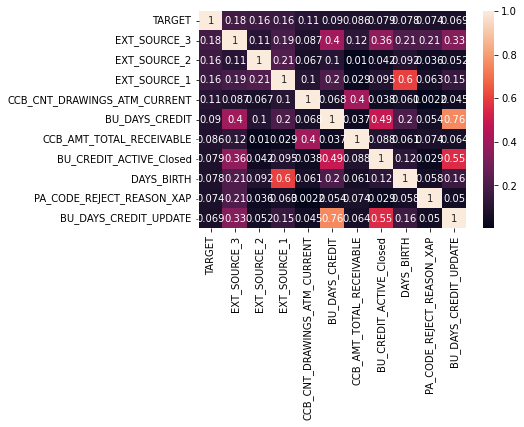

In [ ]:
Top_Features=correlations.sort_values(ascending=False)[:11]
fea_list=list(dict(Top_Features).keys())
sns.heatmap(app_train[fea_list].corr().abs(), annot =True)
plt.show()

In the above heatmap zero means no correlation and 1 means highly correlated. We can see that as we have removed correlated features with value more than 0.8, we dont have any highly correlated features. Max we have BU_DAYS_CREDIT and BU_DAYS_CREDIT_UPDATE with a correlation of 0.76. 

Describing the features using pandas

In [ ]:
app_train[fea_list].describe()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CCB_CNT_DRAWINGS_ATM_CURRENT,BU_DAYS_CREDIT,CCB_AMT_TOTAL_RECEIVABLE,BU_CREDIT_ACTIVE_Closed,DAYS_BIRTH,PA_CODE_REJECT_REASON_XAP,BU_DAYS_CREDIT_UPDATE
count,307511.000000,246546.000000,3.068510e+05,134133.000000,61140.000000,263491.000000,86905.000000,263491.000000,307511.000000,291057.000000,263491.000000
mean,0.080729,0.510853,5.143927e-01,0.502130,0.566241,-1083.047110,70985.788979,0.583112,-16036.995067,0.873979,-546.632499
std,0.272419,0.194844,1.910602e-01,0.211062,0.880410,563.327298,108442.434134,0.308680,4363.988632,0.194505,453.747949
min,0.000000,0.000527,8.173617e-08,0.014568,0.000000,-2922.000000,-2930.232558,0.000000,-25229.000000,0.000000,-41890.000000
25%,0.000000,0.370650,3.924574e-01,0.334007,0.062993,-1434.000000,0.000000,0.400000,-19682.000000,0.750000,-779.000000
50%,0.000000,0.535276,5.659614e-01,0.505998,0.270833,-1050.571429,26559.800000,0.625000,-15750.000000,1.000000,-481.833333
75%,0.000000,0.669057,6.636171e-01,0.675053,0.731343,-663.763889,97909.024091,0.800000,-12413.000000,1.000000,-208.400000
max,1.000000,0.896010,8.549997e-01,0.962693,35.000000,0.000000,913096.639286,1.000000,-7489.000000,1.000000,14.000000


From the above table we can observe that count of most of the features are different this is due to the nan values in the features.
Also in BU_DAYS_CREDIT_UPDATE (ie.How many days before loan application did last information about the Credit Bureau credit come) the max no of days is given as -41890 which is appro 114 years is an outlier. We need to check the other days features too for outliers

# Plotting Distribution Plot on Features

Distribution plot on EXT_SOURCE3

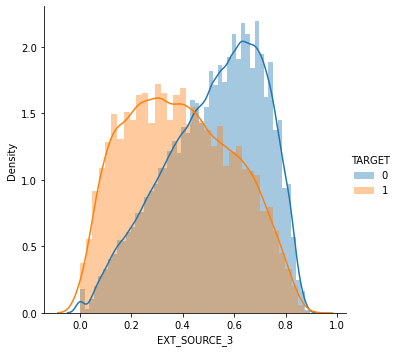

In [ ]:
#Plot distribution of Features
sns.FacetGrid(app_train, hue="TARGET",height=5).map(sns.distplot, fea_list[1]).add_legend()
plt.show()

**Summary:** From the above PDF on EXT_SOURCE_3 its clear that both the classes are overlapping from 0 to 1. But the density of class1 is more near 0 and density of class0 is more near 1. (ie. when the External source3 value is less near 0 the chance of default is high and if its near to 1 the chance of default is low.

Distribution plot on CCB_AMT_TOTAL_RECEIVABLE

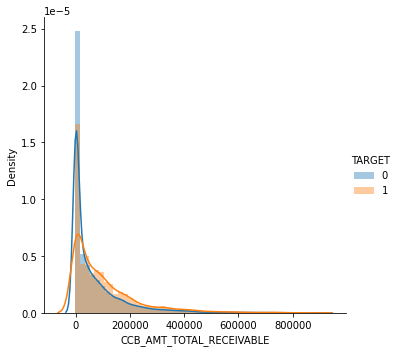

In [ ]:
sns.FacetGrid(app_train, hue="TARGET",height=5).map(sns.distplot, fea_list[6]).add_legend()
plt.show()

**Summary:** From the above PDF on CCB_AMT_TOTAL_RECEIVABLE we notice that most of the values are within 0 to 200000. Only few people have AMT_TOTAL_RECEIVABLE above 200000. Aslo we can see if the amount is less then there is a very high chance of paying it back. But as the amount in increasing the chance of deafault is also increasing

Distribution Plot on BU_DAYS_CREDIT_UPDATE

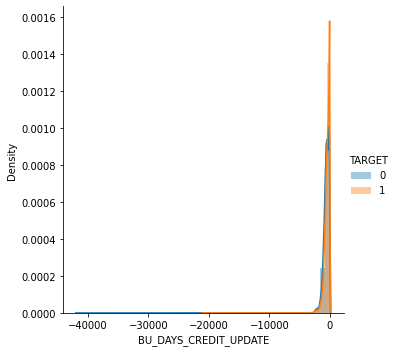

In [ ]:
sns.FacetGrid(app_train, hue="TARGET",height=5).map(sns.distplot, fea_list[10]).add_legend()
plt.show()

In the above plot as mentioned earlier due to the outlier the distribution is very highly skewed. So lets plot this once again without outlier

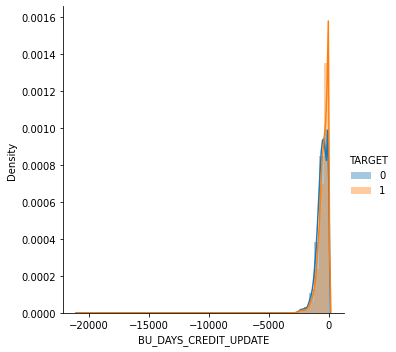

In [ ]:
sns.FacetGrid(app_train[app_train['BU_DAYS_CREDIT_UPDATE']>-25000], hue="TARGET",height=5).map(sns.distplot, fea_list[10]).add_legend()
plt.show()

**Summary:** From the above plot its clear that most of the values are within -4000days that is aprox 10 years, but we have very few values beyond that. Also both the class are highly overlapped. Also if the days is very small negative value or a positive value then the chance of default is high.

# Violin Plot on Features

Violin plot on CCB_CNT_DRAWINGS_ATM_CURRENT

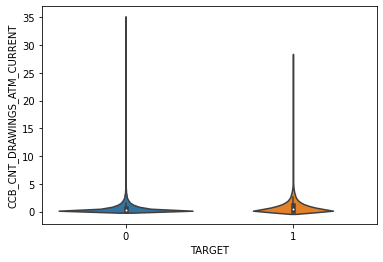

In [ ]:
sns.violinplot(x='TARGET',y=fea_list[4],data=app_train)
plt.show()

**Summary:** From the above plot we can see that we have outliers in the CCB_CNT_DRAWINGS_ATM_CURRENT, we have a max value of 35 which could be an error or maybe correct value. But its a very rare case of 35 ATM widrawals in a month. Lets plot a scatter plot on the CCB_CNT_DRAWINGS_ATM_CURRENT.

Scatter Plot on CCB_CNT_DRAWINGS_ATM_CURRENT

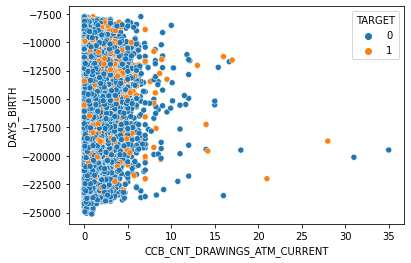

In [ ]:
sns.scatterplot(x='CCB_CNT_DRAWINGS_ATM_CURRENT',y='DAYS_BIRTH',data=app_train, hue ='TARGET')
plt.show()

**Summary:** From the above scatter plot on the CCB_CNT_DRAWINGS_ATM_CURRENT and DAYS_BIRTH we can clearly see we have few outliers with value more than 15 widrawls in a month. We need to handle this before fitting to the model.

Violin Plot on DAYS_BIRTH

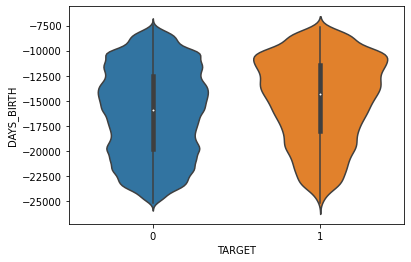

In [ ]:
sns.violinplot(x='TARGET',y=fea_list[8],data=app_train)
plt.show()

**Summary:** Form the above violin plot on Age, its clear that age of the applicant is 25 to 70 years. Also the distribution of non -deafaulter applicant (ie.class0) is almost uniform but as per the distribution of the defaulter the applicant with age between 27 and 34 has a high chance of deafaulting the loan.

# Pair Plots

Pair Plot - 1

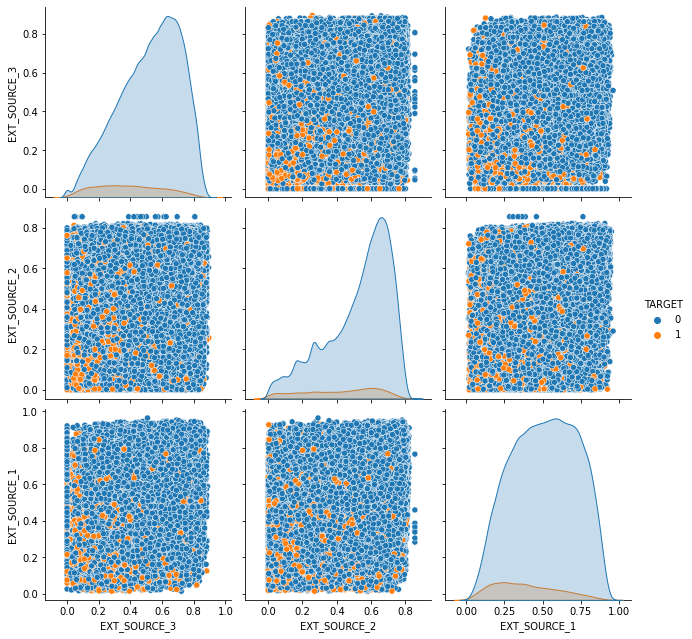

In [ ]:
sns.pairplot(app_train[fea_list[0:4]],hue='TARGET',height=3)
plt.show()

In the above plot we can see that all the three External Source values are between 0 and 1, but we cant seperate the datapoints linearly. Also as the size of data is huge the datapoints are very dense. But we do notice that when both the scores on x and y axis are small we have a chance of default and when both are near 1 , the chance of default is very less.

Pair Plot -2 

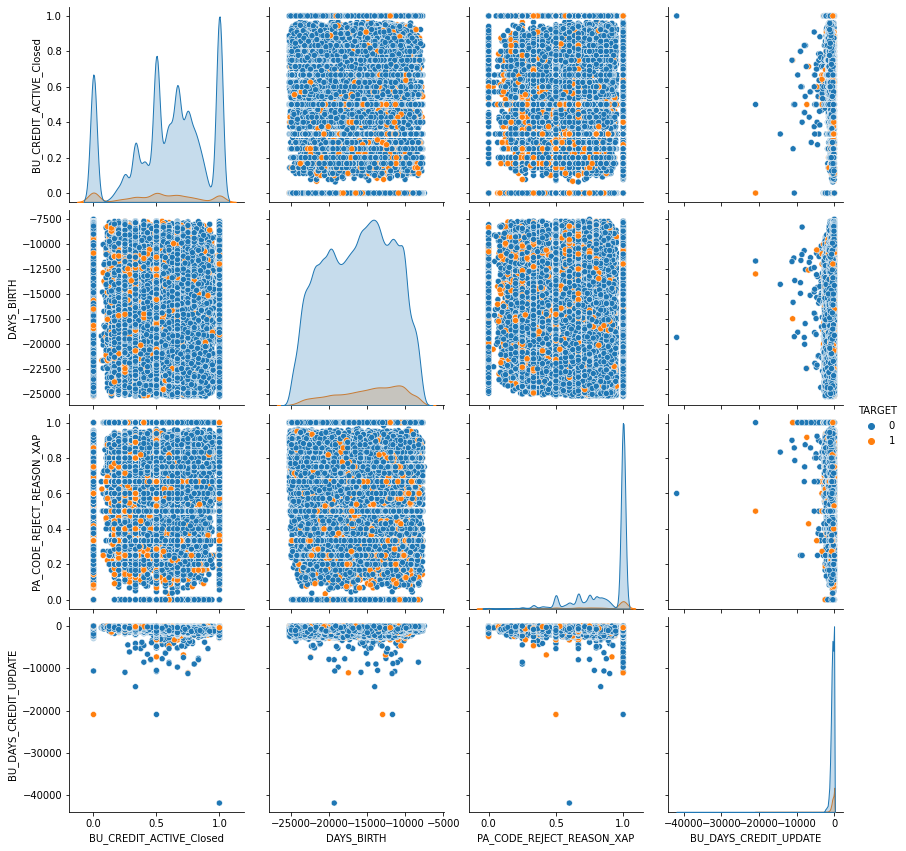

In [ ]:
upd_list=list(fea_list)[7:]
upd_list.append('TARGET')
sns.pairplot(app_train[upd_list],hue='TARGET',height=3)
plt.show()

**Summary:** In the above plot even with these set of features the classes are not linearly separable. Also we can clearly see here there are few outliers in the BU_DAYS_CREDIT_UPDATE which has value more than -100000. 

In [ ]:
for i in app_train.columns.values:
  app_train[i].replace({np.nan:app_train[i].median()}, inplace = True)

In [ ]:
data =app_train.drop(['TARGET','SK_ID_CURR'],axis=1)
labels =app_train['TARGET']

In [ ]:
data.shape

(307511, 398)

In [ ]:
from sklearn.preprocessing import StandardScaler
for i in data.columns.values:
    data[i]=StandardScaler().fit_transform(data[i].values.reshape(-1, 1))

In [ ]:
data.head(1)

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0.142129,-0.166143,-0.507236,-0.149452,1.50688,0.379837,0.579154,-0.146313,0.001803,-0.499013,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,1.935056,-0.133215,0.963763,-0.08734


In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca_data=pca.fit_transform(data)

In [ ]:
pca_data_upd=np.vstack((pca_data.T,labels)).T

In [ ]:
pca_df = pd.DataFrame(data=pca_data_upd,columns=('Dim1','Dim2','label'))

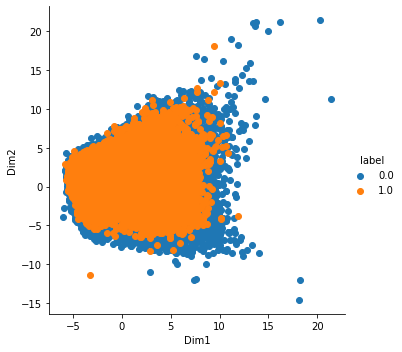

In [ ]:
sns.FacetGrid(data=pca_df,hue='label',size=5).map(plt.scatter, 'Dim1','Dim2').add_legend()
plt.show()

**Summary:** As per the above plot we observe that the variance of both the class is very similar hence both the classes are highly overlapping. Also we observe that Dim1 with values more than 10 are mostly class zero and Dim2 with values more than -7 are mostly class zero.

### **Performace Metric:**

As this is a binary classification problem we could have used the simple accuray as the performance metric, but due to the high imbalance in the data, accuracy will be biased towards the majority of data and can't be used for this problem. Here we can either use F1 score or the ROC AUC curve as the performamce metric as both are not biased in case of imbalance dataset. For this particular problem we will use ROC_AUC_Curve as the performance metric as it will give us a average over all the thresholds and same is the requirement in Kaggle.

### **Conclusion:**

 As the data is highly imbalanced we will be using ROC AUC curve as the performance metric. All the three External Source features are very important features. We need to handle the outliers and NAN values. Most of the features are mutually correlated, we need to drop such redundant features. Both the classes have similar variance hence the PCA features are highly overlapping. We need to do Feature Engineering and create some new features which could contribute better to distinguish between the classes. Also as the features are not linearly separable we must use some non-linear models to get better results.